## imports and installations

In [8]:
!pip install transformers datasets evaluate matplotlib seaborn
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=cf515ec6ce528e0ef56bcb66c25380f5a858da173dbc80b773e89aa5666a90e2
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [25]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from datasets import load_dataset
import evaluate
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [3]:
sns.set(style="whitegrid")


In [4]:
tokenizer = AutoTokenizer.from_pretrained("csebuetnlp/mT5_multilingual_XLSum")
model = AutoModelForSeq2SeqLM.from_pretrained("csebuetnlp/mT5_multilingual_XLSum")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/730 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/4.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:561: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/2.33G [00:00<?, ?B/s]

## Loading Dataset

In [5]:
dataset = load_dataset("abdalrahmanshahrour/ArabicTextSummarization")


README.md:   0%|          | 0.00/261 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


summarizdataset.csv:   0%|          | 0.00/22.4M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8378 [00:00<?, ? examples/s]

## Summarization Module

In [6]:
def summarize_text(text, max_length=150, num_beams=4):
    """
    Summarizes the given text using the mT5 model.
    """
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=1024)
    summary_ids = model.generate(inputs['input_ids'], max_length=max_length, num_beams=num_beams, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)


## ROUGE Score Calculation and Visualization Module


In [9]:
rouge_metric = evaluate.load("rouge")

def compute_rouge_scores(predictions, references):
    """
    Computes ROUGE scores for predictions and references.
    """
    return rouge_metric.compute(predictions=predictions, references=references)


In [10]:
def plot_rouge_scores(rouge_results):
    """
    Plots ROUGE scores as a bar chart.
    """
    metrics = list(rouge_results.keys())
    scores = list(rouge_results.values())
    plt.figure(figsize=(8, 6))
    sns.barplot(x=metrics, y=scores, palette="viridis")
    plt.title("ROUGE Scores", fontsize=14)
    plt.xlabel("Metric", fontsize=12)
    plt.ylabel("F1-Score", fontsize=12)
    plt.ylim(0, 1)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

In [11]:
generated_summaries = []
reference_summaries = []

In [12]:
for i in range(10):
    article_text = dataset['train'][i]['text']
    reference_summary = dataset['train'][i]['text']
    summary = summarize_text(article_text)

    generated_summaries.append(summary)
    reference_summaries.append(reference_summary)

    print(f"Article {i+1}:")
    print(f"Original Text: {article_text[:500]}...")
    print(f"Generated Summary: {summary}")
    print("-" * 80)

Article 1:
Original Text: 
أشرف رئيس الجمهورية الباجي قايد السبسي اليوم بقصر قرطاج على موكب منح الوسام الوطني للاستحقاق الثقافي لثلّة من الفنانين والمبدعين و ذلك بمناسبة انعقاد أيام قرطاج السينمائية.
والفنانون هم : *الصنف الأوّل: - عبد الرحمان سيساكو (موريتانيا) - جميل راتب (مصر) - ميشال خليفي (فلسطين) - ادريسا ودراغو (بوركينا فاسو) - محمد ملص (سوريا) - رضا الباهي (تونس: تعذّر عليه الحضور) - عمر الخليفي (تونس) *الصنف الثاني: - عبد العزيز بن ملوكة (تونس) - نجيب عيّاد (تونس) - منصف شرف الدين (تونس: تعذّر عليه الحضور) *الصن...
Generated Summary: يشارك عدد من الفنانين والمبدعين في أيام قرطاج السينمائية في العاصمة التونسية.
--------------------------------------------------------------------------------
Article 2:
Original Text: 
تحصل كتاب "المصحف وقراءاته" الذي ألفه باحثون تونسيون متخصصون، على جائزة عربية على هامش افتتاح معرض بيروت العربي الدولي للكتاب الذي افتتح امس ويتواصل إلى يوم 14 ديسمبر الحالي.
وأسند النادي الثقافي العربي الجائزة الثالثة لـ: "المصحف وقراءاته"، الذي جاء في خمسة مجلدات

In [13]:
rouge_results = compute_rouge_scores(generated_summaries, reference_summaries)
print("\nROUGE Scores:")
print(rouge_results)

Article 1:
Original Text: 
أشرف رئيس الجمهورية الباجي قايد السبسي اليوم بقصر قرطاج على موكب منح الوسام الوطني للاستحقاق الثقافي لثلّة من الفنانين والمبدعين و ذلك بمناسبة انعقاد أيام قرطاج السينمائية.
والفنانون هم : *الصنف الأوّل: - عبد الرحمان سيساكو (موريتانيا) - جميل راتب (مصر) - ميشال خليفي (فلسطين) - ادريسا ودراغو (بوركينا فاسو) - محمد ملص (سوريا) - رضا الباهي (تونس: تعذّر عليه الحضور) - عمر الخليفي (تونس) *الصنف الثاني: - عبد العزيز بن ملوكة (تونس) - نجيب عيّاد (تونس) - منصف شرف الدين (تونس: تعذّر عليه الحضور) *الصن...
Generated Summary: يشارك عدد من الفنانين والمبدعين في أيام قرطاج السينمائية في العاصمة التونسية.
--------------------------------------------------------------------------------
Article 2:
Original Text: 
تحصل كتاب "المصحف وقراءاته" الذي ألفه باحثون تونسيون متخصصون، على جائزة عربية على هامش افتتاح معرض بيروت العربي الدولي للكتاب الذي افتتح امس ويتواصل إلى يوم 14 ديسمبر الحالي.
وأسند النادي الثقافي العربي الجائزة الثالثة لـ: "المصحف وقراءاته"، الذي جاء في خمسة مجلدات

In [15]:
rouge_results = compute_rouge_scores(generated_summaries, reference_summaries)


In [16]:
print(generated_summaries)
print(reference_summaries)


['يشارك عدد من الفنانين والمبدعين في أيام قرطاج السينمائية في العاصمة التونسية.', 'تحصل كتاب "المصحف وقراءاته" الذي ألفه باحثون تونسيون متخصصون، على جائزة عربية الخميس.', 'أعلن المركز الوطني للسينما والصورة في تونس أن صندوق إنتاج مشترك تونسي فرنسي يمكن أن يتيح لتمويل الأفلام المرشحة لمهرجان كان السينمائي.', 'شهدت العاصمة الألمانية برلين أمس الجمعة افتتاح مسجد فريد من نوعه على الأقل.', 'في ذكرى مرور عشر سنوات على مقتل المنشد الصّوفي عز الدّين بن محمود في العاصمة التونسيّة تونس.', 'أعلنت وزارة الشؤون الثقافية تعيين مدير الدورة 27 لأيام قرطاج السينمائية.', 'استضاف برنامج "سينما سينما" الأربعاء 18 جانفي 2017 في موعد استثنائي، أبطال الفيلم التونسي الطويل "غدوة حيّ" Demain Dès l\'Aube و مخرج العمل لطفي عاشور.', 'أعلن مدير التظاهرة الموسيقية الالكترونية صوت الصحراء "Sounds of Sahara" في دورتها الثانية بمدينة توزر بعد يومين.', 'يفتتح مهرجان القيروان للشعر العربي بالتنسيق مع بيت الشارقة في العاصمة التونسية.', 'تحتضن دار الثقافة في مدينة المروج التونسية الدورة الخامسة للمهرجان الدولي لفن المهرج 

## Dataset Analysis and Visualization Module



ROUGE Scores:
{'rouge1': 0.19857142857142857, 'rouge2': 0.14666666666666667, 'rougeL': 0.20571428571428568, 'rougeLsum': 0.19571428571428573}


<ipython-input-17-112f2dc75bad>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=scores, palette="viridis")


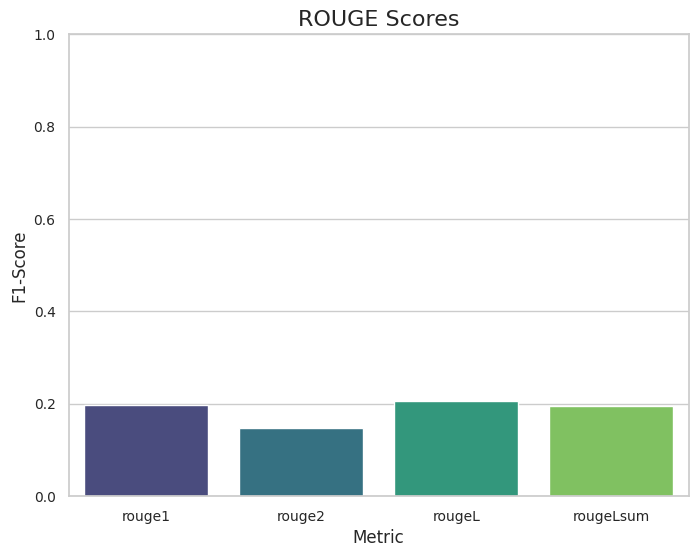

In [18]:
generate_rouge_scores(generated_summaries, reference_summaries)


In [26]:

sns.set(style="whitegrid")

data = pd.DataFrame(dataset['train'])

def plot_text_length_distribution(data, column="text"):
    """
    Plots the distribution of text lengths in the dataset.
    """
    data['text_length'] = data[column].apply(lambda x: len(x.split()))
    plt.figure(figsize=(6, 4))
    sns.histplot(data['text_length'], bins=30, kde=True, color='skyblue')
    plt.title("Text Length Distribution", fontsize=16)
    plt.xlabel("Number of Words", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()



In [27]:
def plot_sample_text_lengths(data, n=10, column="text"):
    """
    Plots the lengths of sample articles.
    """
    sample_lengths = data[column].apply(lambda x: len(x.split())).head(n)
    plt.figure(figsize=(6, 4))
    sns.barplot(x=sample_lengths.index, y=sample_lengths.values, palette="coolwarm")
    plt.title("Text Lengths of Sample Articles", fontsize=16)
    plt.xlabel("Sample Index", fontsize=12)
    plt.ylabel("Number of Words", fontsize=12)
    plt.show()





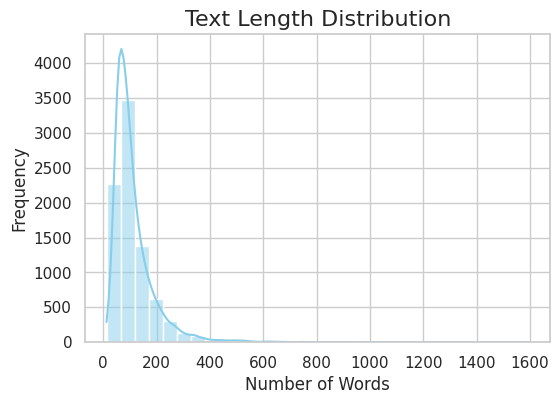

<ipython-input-27-5e01ec74748f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sample_lengths.index, y=sample_lengths.values, palette="coolwarm")


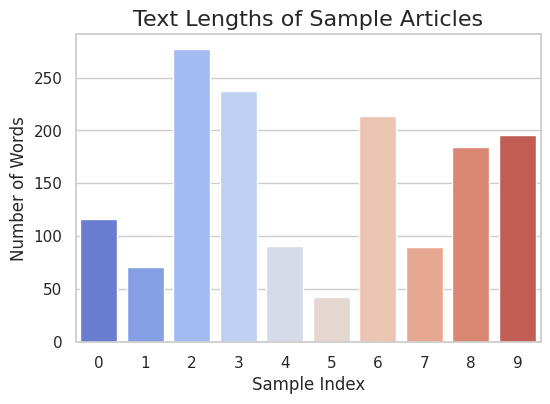

In [28]:

plot_text_length_distribution(data)
plot_sample_text_lengths(data)